In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
dengue_features=pd.read_csv("dengue_features_train.csv")
dengue_targets=pd.read_csv("dengue_labels_train.csv")

In [3]:
sj_city=dengue_targets.loc[dengue_targets['city']=='sj',['city','year','total_cases']]
sj_city=sj_city.groupby(['city','year']).agg('sum').reset_index()


In [8]:
sj_city=sj_city.loc[sj_city['year']>1999, :]

In [6]:
iq_city=dengue_targets.loc[dengue_targets['city']=='iq',['city','year','total_cases']]
iq_city=iq_city.groupby(['city','year']).agg('sum').reset_index()

In [13]:
iq_city=iq_city.loc[iq_city['year']<2009,:]

In [14]:
bar_df=pd.concat([sj_city,iq_city],axis=0)
bar_df['city']= bar_df['city'].apply(lambda x: "San juan" if x=='sj' else "Iquitos")

<AxesSubplot:title={'center':'Casos de dengue por año'}, xlabel='year', ylabel='total_cases'>

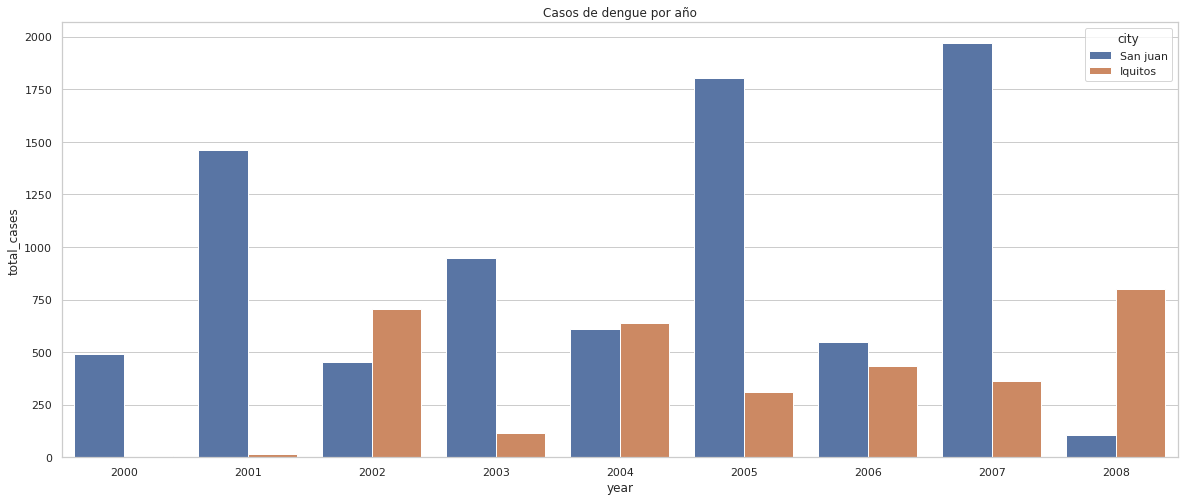

In [15]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(20,8))
plt.title("Casos de dengue por año")
sns.barplot(x='year',y='total_cases',hue='city',data=bar_df)